In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!rm -rf data
!mkdir data

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset
!unzip data.zip -d /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet/data

In [ ]:
import os
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg

num_classes = 4
print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
if os.path.exists('./AIP391_Group10/SourceCode-Dataset/darknet/cfg/custom-yolov4-detector.cfg'): os.remove('./AIP391_Group10/SourceCode-Dataset/darknet/cfg/custom-yolov4-detector.cfg')

%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
with open('./cfg/custom-yolov4-detector.cfg', 'a') as f:
  f.write('[net]' + '\n')
  f.write('batch=64' + '\n')
  f.write('subdivisions=16' + '\n')
  f.write('width=608' + '\n')
  f.write('height=608' + '\n')
  f.write('channels=3' + '\n')
  f.write('momentum=0.949' + '\n')
  f.write('decay=0.0005' + '\n')
  f.write('angle=0' + '\n')
  f.write('saturation = 1.5' + '\n')
  f.write('exposure = 1.5' + '\n')
  f.write('hue = .1' + '\n')
  f.write('\n')
  f.write('learning_rate=0.001' + '\n')
  f.write('burn_in=1000' + '\n')
  max_batches = num_classes*2000
  f.write('max_batches=' + str(max_batches) + '\n')
  f.write('policy=steps' + '\n')
  steps1 = .8 * max_batches
  steps2 = .9 * max_batches
  f.write('steps='+str(steps1)+','+str(steps2) + '\n')

#Instructions from the darknet repo
#change line classes=80 to your number of objects in each of 3 [yolo]-layers:
#change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.

  with open('./cfg/yolov4-custom2.cfg', 'r') as f2:
    content = f2.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('\nfilters='+str(num_filters) + '\n')
    f.write('activation=linear\n')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 0,1,2' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')

  with open('cfg/yolov4-custom3.cfg', 'r') as f3:
    content = f3.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('\nfilters='+str(num_filters) + '\n')
    f.write('activation=linear\n')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 3,4,5' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')

  with open('cfg/yolov4-custom4.cfg', 'r') as f4:
    content = f4.readlines()
    for line in content:
      f.write(line)    
    num_filters = (num_classes + 5) * 3
    f.write('\nfilters='+str(num_filters) + '\n')
    f.write('activation=linear\n')
    f.write('\n')
    f.write('\n')
    f.write('[yolo]' + '\n')
    f.write('mask = 6,7,8' + '\n')
    f.write('anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401' + '\n')
    f.write('classes=' + str(num_classes) + '\n')
    
  with open('cfg/yolov4-custom5.cfg', 'r') as f5:
    content = f5.readlines()
    for line in content:
      f.write(line)

print("file is written!")

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
%cat cfg/custom-yolov4-detector.cfg

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!mkdir backup
!echo classes=4 > yolo.data
!echo train=train.txt >> yolo.data
!echo valid=val.txt >> yolo.data
!echo names=yolo.names >> yolo.data
!echo backup=backup >> yolo.data

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!rm darknet
!make

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!./darknet detector train yolo.data cfg/custom-yolov4-detector.cfg yolov4.conv.137 -dont_show

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!chmod +x ./darknet

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!./darknet detector train yolo.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_last.weights -dont_show 

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!./darknet detector map yolo.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_last.weights

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet/cfg
!sed -i 's/batch=64/batch=1/' custom-yolov4-detector.cfg
!sed -i 's/subdivisions=32/subdivisions=1/' custom-yolov4-detector.cfg

/content/gdrive/My Drive/AIP391_Group10/SourceCode-Dataset/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    832 x 832 x   3 ->  832 x 832 x  32 1.196 BF
   1 conv     64       3 x 3/ 2    832 x 832 x  32 ->  416 x 416 x  64 6.380 BF
   2 conv     64       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  64 1.418 BF
   3 route  1 		                           ->  416 x 416 x  64 
   4 conv     64       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  64 1.418 BF
   5 conv     32       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  32 0.709 BF
   6 conv     64       3 x 3/ 1    416 x 416 x  32 ->  416 x 416 x  64 6.380 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs

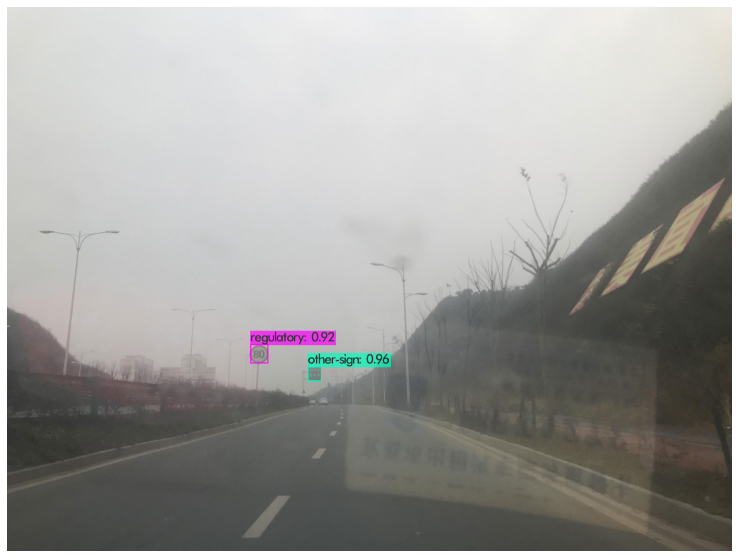

In [ ]:
%cd /content/gdrive/My\ Drive/AIP391_Group10/SourceCode-Dataset/darknet
!./darknet detector test yolo.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_last.weights data/data/vUZPVlNtBvPQcrSEZgp3vw.jpg -thresh 0.3
imShow('predictions.jpg')